<a href="https://colab.research.google.com/github/ofgkts/Portfolio-Projects/blob/main/bus_breakdown_delays_and_mlprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 
import numpy as np 
bus=pd.read_csv('/content/drive/MyDrive/proje/Omer Code/projects/bus_breakdown/bus-breakdowns-delays.csv')
df=bus.copy()
df.head()

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (17) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,School_Year,Busbreakdown_ID,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,...,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Incident_Number,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK
0,2015-2016,1227538,Special Ed AM Run,2621,J711,Heavy Traffic,75003,11/05/2015 08:10:00 AM,11/05/2015 08:12:00 AM,New Jersey,...,NaN,11,Yes,No,Yes,11/05/2015 08:12:00 AM,NaN,11/05/2015 08:12:14 AM,Running Late,School-Age
1,2015-2016,1227539,Special Ed AM Run,1260,M351,Heavy Traffic,06716,11/05/2015 08:10:00 AM,11/05/2015 08:12:00 AM,Manhattan,...,20MNS,2,Yes,Yes,No,11/05/2015 08:12:00 AM,NaN,11/05/2015 08:13:34 AM,Running Late,School-Age
2,2015-2016,1227540,Pre-K/EI,418,3,Heavy Traffic,C445,11/05/2015 08:09:00 AM,11/05/2015 08:13:00 AM,Bronx,...,15MIN,8,Yes,Yes,Yes,11/05/2015 08:13:00 AM,NaN,11/05/2015 08:13:22 AM,Running Late,Pre-K
3,2015-2016,1227541,Special Ed AM Run,4522,M271,Heavy Traffic,02699,11/05/2015 08:12:00 AM,11/05/2015 08:14:00 AM,Manhattan,...,15 MIN,6,No,No,No,11/05/2015 08:14:00 AM,NaN,11/05/2015 08:14:04 AM,Running Late,School-Age
4,2015-2016,1227542,Special Ed AM Run,3124,M373,Heavy Traffic,02116,11/05/2015 08:13:00 AM,11/05/2015 08:14:00 AM,Manhattan,...,NaN,6,No,No,No,11/05/2015 08:14:00 AM,NaN,11/05/2015 08:14:08 AM,Running Late,School-Age


### About Dataset
`The Bus Breakdown and Delay system collects information from school bus vendors operating out in the field in real time. Bus staff that encounter delays during the route are instructed to radio the dispatcher at the bus vendor’s central office. The bus vendor staff are then instructed to log into the Bus Breakdown and Delay system to record the event and notify OPT. OPT customer service agents use this system to inform parents who call with questions regarding bus service. The Bus Breakdown and Delay system is publicly accessible and contains real time updates. All information in the system is entered by school bus vendor staf`

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545691 entries, 0 to 545690
Data columns (total 21 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   School_Year                      545691 non-null  object
 1   Busbreakdown_ID                  545691 non-null  int64 
 2   Run_Type                         545685 non-null  object
 3   Bus_No                           545678 non-null  object
 4   Route_Number                     545684 non-null  object
 5   Reason                           545689 non-null  object
 6   Schools_Serviced                 545684 non-null  object
 7   Occurred_On                      545691 non-null  object
 8   Created_On                       545691 non-null  object
 9   Boro                             534474 non-null  object
 10  Bus_Company_Name                 545691 non-null  object
 11  How_Long_Delayed                 491627 non-null  object
 12  Number_Of_Studen

In [3]:
df.isna().sum()

School_Year                             0
Busbreakdown_ID                         0
Run_Type                                6
Bus_No                                 13
Route_Number                            7
Reason                                  2
Schools_Serviced                        7
Occurred_On                             0
Created_On                              0
Boro                                11217
Bus_Company_Name                        0
How_Long_Delayed                    54064
Number_Of_Students_On_The_Bus           0
Has_Contractor_Notified_Schools         0
Has_Contractor_Notified_Parents         0
Have_You_Alerted_OPT                    0
Informed_On                             0
Incident_Number                    534801
Last_Updated_On                         0
Breakdown_or_Running_Late               0
School_Age_or_PreK                      0
dtype: int64

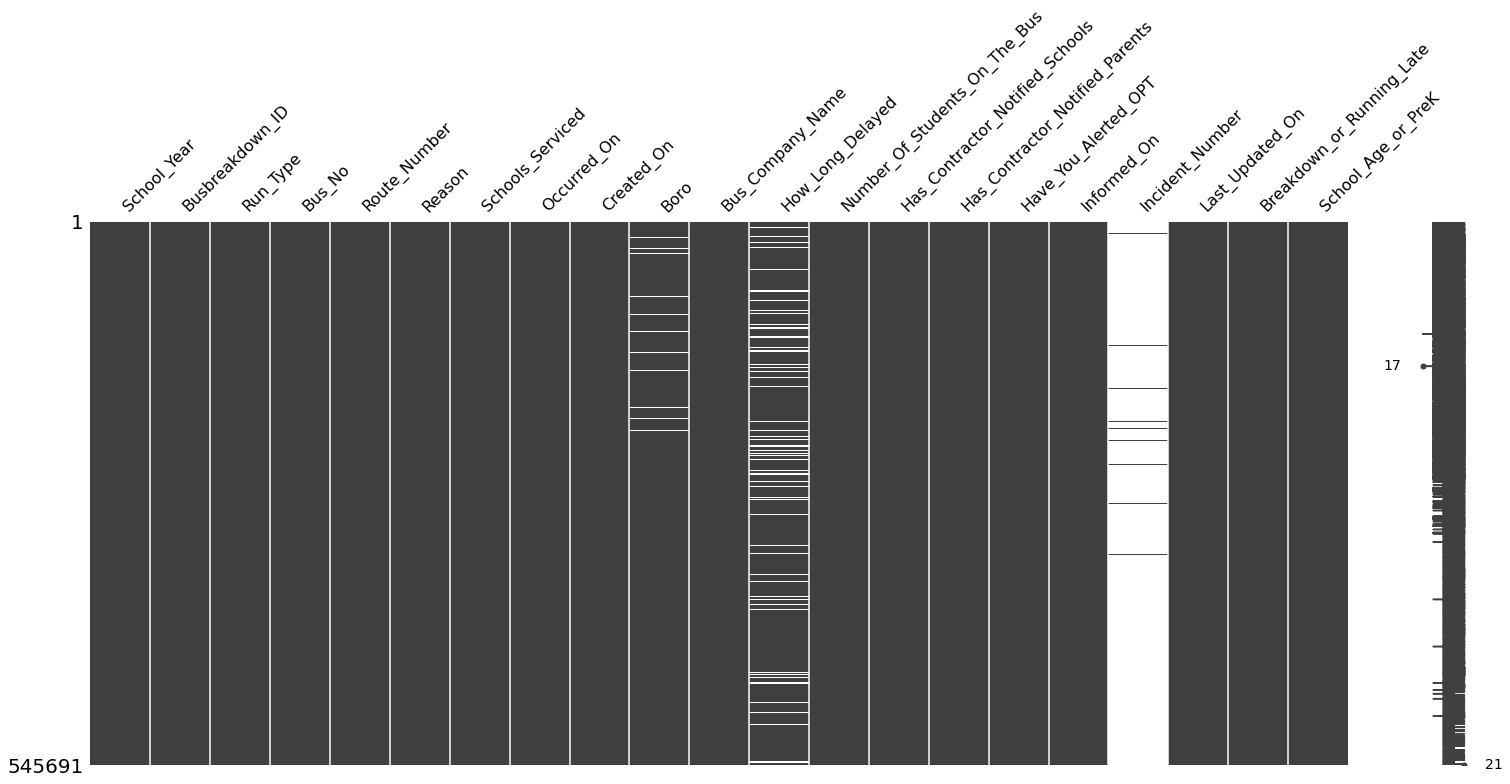

In [4]:
import missingno as msno
msno.matrix(df)


### i will drop incident number
### there is columns to change datetime year ,minute 
### target is how long it delayed and it is had null values i am going to split nulls another dataframe  
### look correleation and drop low or non correlated columns 
### maybe i could predict boro too it is borough change column name
### i need to detect  are there any outliers 
### look what is the nulls  in other columns 
### i could work on what is may be the reasons of possible reasons  

In [5]:
df.drop('Incident_Number',axis=1,inplace=True)#drop null column
df['Occurred_On'] = pd.to_datetime(df['Occurred_On'])
df['Created_On'] = pd.to_datetime(df['Created_On'])
df['Informed_On'] = pd.to_datetime(df['Informed_On'])
df['Last_Updated_On'] = pd.to_datetime(df['Last_Updated_On'])
#change datetime type

In [6]:
df[['school_start_year','school_end_year']]=df['School_Year'].str.split('-',expand=True)
#split for the date time changing 

In [7]:
df["school_start_year"] = pd.to_datetime(df["school_start_year"])
df["school_end_year"] = pd.to_datetime(df["school_end_year"])
#it includes months and days change them

In [8]:
df["school_start_year"] = df["school_start_year"].dt.year
df["school_end_year"] = df["school_end_year"].dt.year


In [9]:
df=df.rename(columns={'Boro':'Borough'})
df.drop('School_Year',axis=1,inplace=True)
pred_col=df[df['How_Long_Delayed'].isna()]
df1=df[df['How_Long_Delayed'].notna()]
pred_col.head()


,Busbreakdown_ID,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Borough,Bus_Company_Name,...,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK,school_start_year,school_end_year
0,1227538,Special Ed AM Run,2621,J711,Heavy Traffic,75003,2015-11-05 08:10:00,2015-11-05 08:12:00,New Jersey,"RELIANT TRANS, INC. (B232",...,11,Yes,No,Yes,2015-11-05 08:12:00,2015-11-05 08:12:14,Running Late,School-Age,2015,2016
4,1227542,Special Ed AM Run,3124,M373,Heavy Traffic,02116,2015-11-05 08:13:00,2015-11-05 08:14:00,Manhattan,"RELIANT TRANS, INC. (B232",...,6,No,No,No,2015-11-05 08:14:00,2015-11-05 08:14:08,Running Late,School-Age,2015,2016
16,1227558,Special Ed AM Run,2052,L524,Flat Tire,17246,2015-11-05 08:22:00,2015-11-05 08:25:00,NaN,"RELIANT TRANS, INC. (B232",...,4,Yes,Yes,Yes,2015-11-05 08:25:00,2015-11-05 08:25:11,Running Late,School-Age,2015,2016
18,1227561,Special Ed AM Run,2508,L531,Heavy Traffic,13009,2015-11-05 08:25:00,2015-11-05 08:26:00,Bronx,"RELIANT TRANS, INC. (B232",...,4,No,No,No,2015-11-05 08:26:00,2015-11-05 08:26:54,Running Late,School-Age,2015,2016
22,1227077,General Ed AM Run,2675,X2189,Other,10095,2015-11-04 07:04:00,2015-11-04 07:11:00,Bronx,"GRANDPA`S BUS CO., INC.",...,0,Yes,Yes,No,2015-11-04 07:11:00,2015-11-04 07:11:53,Breakdown,School-Age,2015,2016


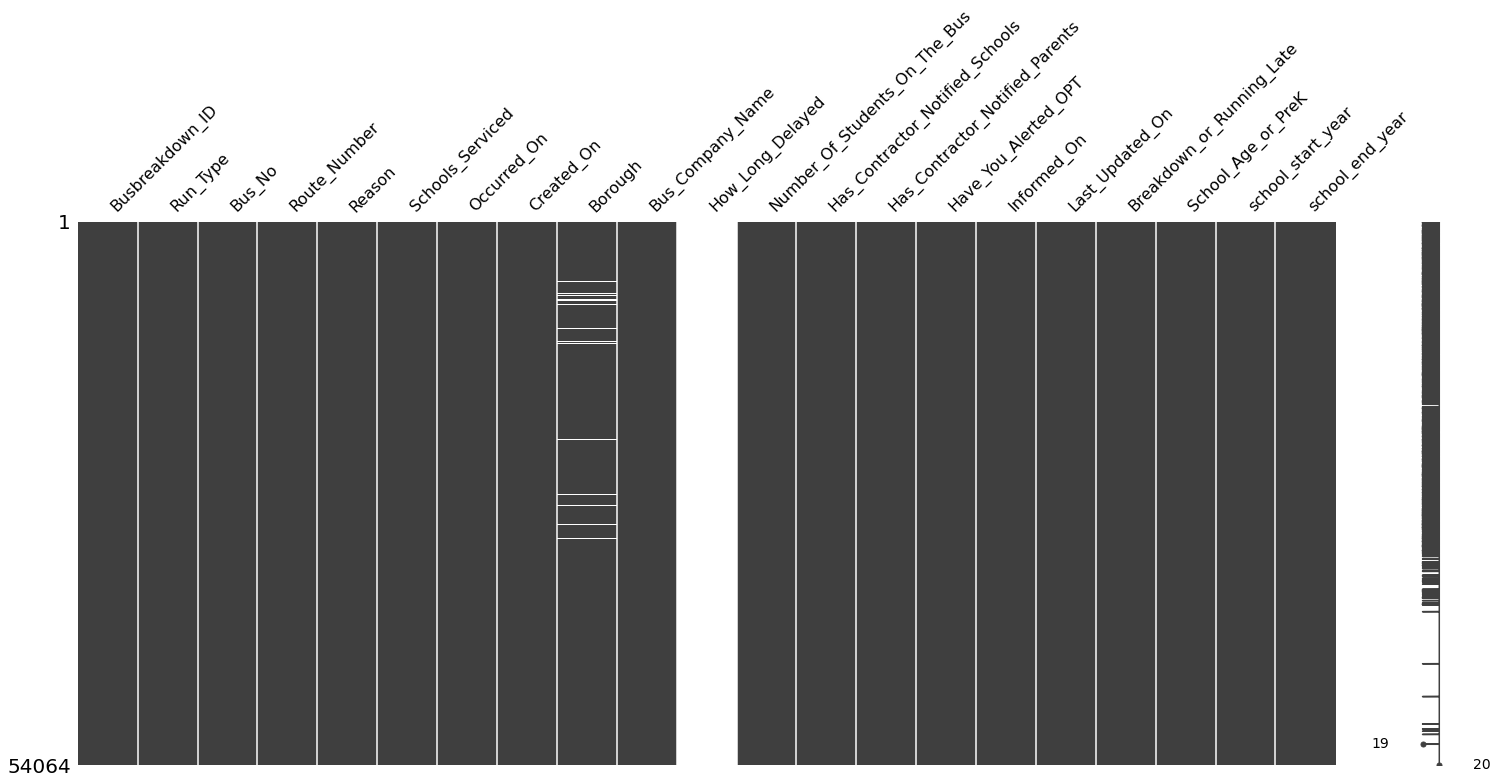

In [10]:
msno.matrix(pred_col)

In [11]:
df1['How_Long_Delayed'].value_counts().head(50)#this is some shitty data i need to clean it include mins minute this column my target column also i need to I also need to handle values ​​that give minute intervals

31-45 Min     119486
16-30 Min     111475
46-60 Min      64958
0-15 Min       40152
61-90 Min      27713
20 MINS         5730
30 MINS         4688
30 minutes      3757
15 mins         3538
30MINS          3207
20 mins         3170
20 min          2940
30 min          2928
15 MINS         2853
20 MIN          2624
30 MIN          2539
20              2499
15MINS          1989
30 mins         1903
15 minutes      1787
45 MIN          1785
25 MIN          1746
45 MINS         1716
20-30 min       1570
25 MINS         1540
10 mins         1472
30mins          1371
15 min          1315
45MINS          1297
20mins          1267
30min           1125
15MIN           1120
20-30mins       1089
20MIN           1064
25 min          1039
45MIN           1033
15              1015
20 MINTUES      1013
30               980
10 MIN           953
1 hr             875
15-20 min        869
25-30 MIN        828
20 minutes       823
25 mins          800
25 MINUTES       786
45 mins          764
20MINS       

In [12]:
a=['h','H']
mask = df1['How_Long_Delayed'].str.contains('|'.join(a), case=False)
df_filtered = df1[mask]
value_counts = df_filtered['How_Long_Delayed'].value_counts()

value_counts[:60]

1 hr          875
1 HOUR        668
1 hour        529
1 HR          425
1HR           334
1hr           290
1 Hour        226
1/2 HOUR       98
1HOUR          80
1 Hr           49
2HRS           44
1hour          37
1/2 hour       37
45min/1hr      35
1 hr 30min     29
1/2 hr         28
1 hr 30 mi     26
1HRS           25
1 HR.          20
1hr 30mins     16
2 hours        15
1hr 15mins     15
1/2 HOUR?      15
45-1hr         14
45 min-1 h     14
2 HRS          14
1hr 20mins     14
1.5 hour       10
1 1/2 HR        9
2 hrs           9
2 HOURS         7
1 hr 30         7
45 min-1hr      7
1hr 30 min      6
1HR 30 MIN      6
1hr?????        6
45MIN-1HR       5
45-1hour        5
1hr/30min       5
45 -1 hour      5
1 hrs           4
45min-1hr       4
2 hr            4
1hr????         4
1hr 30min       3
1hr-1 1/2       3
1 HRS           3
45-1 HR         3
2hr             3
2 hour          3
1 hr.           3
1.5 HRS         3
1/2hour         3
1 HOUR 15M      3
45min-1 hr      3
45-1HR    

### solution attempt 1 
### my path is going to seperate data frame by minutes or hour which contains h, hr or m minute 
### after then turn hour ones minute and if it is sliced take avarage in column 
### also minute one is needs to clean but it is going to more easy  it's path is the same clean minute part and take average of two sliced part 

In [13]:


# create the 'minutes' DataFrame
minutes_df = df1.loc[df1['How_Long_Delayed'].str.contains("m|M", na=False)]

# create the 'hours' DataFrame
hours_df = df1.loc[df1['How_Long_Delayed'].str.contains("h|H", na=False)] 
hours_df['How_Long_Delayed'].value_counts()

1 hr          875
1 HOUR        668
1 hour        529
1 HR          425
1HR           334
             ... 
1hr/15min       1
1hr45min        1
1hr 45mins      1
45/1HR          1
1:00 hour       1
Name: How_Long_Delayed, Length: 174, dtype: int64

In [14]:
minutes_df['How_Long_Delayed'] = minutes_df['How_Long_Delayed'].str.lower()

<ipython-input-14-1bf4602f256a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  minutes_df['How_Long_Delayed'] = minutes_df['How_Long_Delayed'].str.lower()


In [15]:
minutes_df['How_Long_Delayed'].value_counts()

31-45 min     119486
16-30 min     111475
46-60 min      64958
0-15 min       40152
61-90 min      27713
               ...  
est.9:15am         1
30 minj            1
10-15 mion         1
30mine             1
45 miniute         1
Name: How_Long_Delayed, Length: 1078, dtype: int64

In [16]:
hours_df['How_Long_Delayed']=hours_df['How_Long_Delayed'].str.lower() 

<ipython-input-16-0690c46fa559>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hours_df['How_Long_Delayed']=hours_df['How_Long_Delayed'].str.lower()


In [17]:
hours_df['How_Long_Delayed'].value_counts()

1 hour       1423
1 hr         1349
1hr           625
1/2 hour      135
1hour         118
             ... 
40/1hr          1
1:30 h          1
30hour          1
451hr           1
1:00 hour       1
Name: How_Long_Delayed, Length: 139, dtype: int64

In [18]:
def clean_data(df, column):
    new_column = column + "_clean"
    df[new_column] = df[column].apply(lambda x: x.split("/")[1] if "/" in x else x.split("-")[1] if "-" in x else x)
    df[column]= df[column].apply(lambda x: x.split("/")[0] if "/" in x else x.split("-")[0] if "-" in x else x)


clean_data(hours_df,'How_Long_Delayed' )


<ipython-input-18-673305a39c45>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[new_column] = df[column].apply(lambda x: x.split("/")[1] if "/" in x else x.split("-")[1] if "-" in x else x)
<ipython-input-18-673305a39c45>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column]= df[column].apply(lambda x: x.split("/")[0] if "/" in x else x.split("-")[0] if "-" in x else x)


In [42]:
hours_df[['How_Long_Delayed']].value_counts().head(60)

How_Long_Delayed
1 hour              1423
1 hr                1349
1hr                  637
1                    184
1hour                118
45min                 47
2hrs                  46
1 hr 30min            30
1 hr 30 mi            28
45                    27
1hrs                  25
2 hours               24
1 hr.                 24
2 hrs                 23
45 min                22
1hr 30mins            16
1hr 15mins            15
1hr 20mins            14
1hr 30 min            12
1 1                   11
1.5 hour              10
1 hr 30                7
1 hrs                  7
1hr 30min              6
1hr?????               6
45                     6
2 hour                 5
1hr????                4
2 hr                   4
50                     4
1:hr                   4
40                     4
2:hr                   4
1 hours                4
2hr                    4
1 hour 15m             3
1hr-1 1                3
hour                   3
1.5 hrs                3
half hou

In [ ]:
hours_df[['How_Long_Delayed']].value_counts().tail(60)

### this worked now it is time for change drop if index has any "h" and replace with multipled 60 if it has  minute it needs to add hours and minute 

In [37]:
hours_df['How_Long_Delayed'].apply(lambda x: ((x.split('h')[0]).replace)

80         1
93         1
336        1
459       1 
466       1 
          ..
313036    1 
313039    1 
313078    1 
313127    1 
313142    1 
Name: How_Long_Delayed, Length: 4257, dtype: object

In [ ]:
hours_df['How_Long_Delayed'].apply(lambda x: x.split("/")[1] if "/" in x else x.split("-")[1] if "-" in x else x)


In [ ]:
def convert_index(df):
    df.index = df.map(lambda x: float(x.split("h")[0])*60 + float(x.split("m")[0].strip()) if "h" in x else float(x.split("m")[0].strip()) if "m" in x else x)
    return df

convert_index(hours_df['How_Long_Delayed'])


ValueError: ignored